In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file_path = "C:/Users/PC/Desktop/midproject/data/전공일치.xlsx"
df = pd.read_excel(file_path)

# 첫 행을 컬럼으로 설정
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

c:\Users\PC\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_filtered = df[(df['연령별'] == '15~29세') & (df['성별'] == '계')]


In [4]:
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

In [5]:
year_columns = {
    '2017': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2018': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2019': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2020': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2021': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2022': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2023': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2024': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
}

In [6]:
# 열 인덱스 기준으로 연도별 그룹 만들기 (2017: 2~6, 2018: 7~11, ...)
year_ranges = {
    '2017': df.columns[2:7],
    '2018': df.columns[7:12],
    '2019': df.columns[12:17],
    '2020': df.columns[17:22],
    '2021': df.columns[22:27],
    '2022': df.columns[27:32],
    '2023': df.columns[32:37],
    '2024': df.columns[37:42],
}

labels = ['매우일치', '일치', '보통', '불일치', '매우불일치']  # 나중에 순서 맞게 바꿔줄게
reverse_labels = labels[::-1]


In [7]:
values = df_filtered[cols].iloc[0]
values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)
values = list(values)[1:]  # '계' 제외한 4개 항목만 사용

NameError: name 'cols' is not defined

In [ ]:
values = df_filtered[cols[1:]].iloc[0]
values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)

c:\Users\PC\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\PC\AppData\Local\Temp\ipykernel_39000\3497805622.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = (values[i] / total) * 100 if total > 0 else 0
C:\Users\PC\AppData\Local\Temp\ipykernel_39000\3497805622.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = (values[i] / total) * 100 if total > 0 else 0
C:\Users\PC\AppData\Local\Temp\ipykernel_39000\3497805622.py:45: FutureWarning

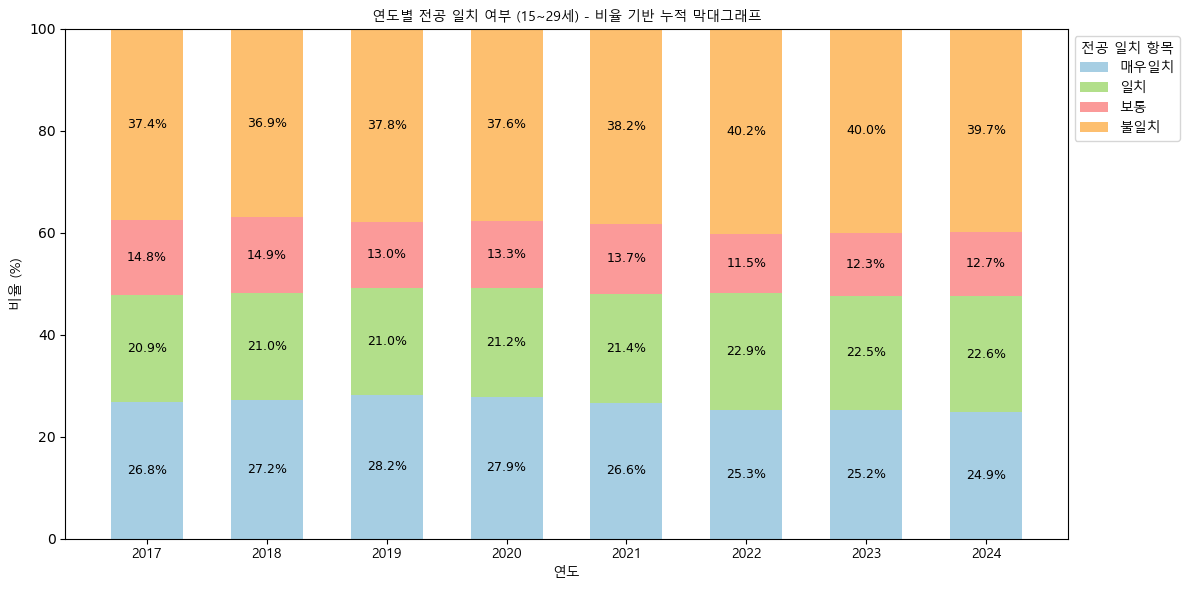

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 1. 엑셀 파일 불러오기
file_path = "C:/Users/PC/Desktop/midproject/data/전공일치.xlsx"
df = pd.read_excel(file_path)

# 2. 첫 행을 컬럼으로 지정
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df.columns = df.columns.astype(str)

# 3. 조건 필터링 (15~29세, 전체 성별)
df_filtered = df[(df['연령별'] == '15~29세') & (df['성별'] == '계')]

# 4. 한글 폰트 설정 (Windows 기준)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 5. 연도별 열 인덱스 설정 (매우일치~불일치 순서)
year_indices = {
    '2017': list(range(3, 7)),
    '2018': list(range(8, 12)),
    '2019': list(range(13, 17)),
    '2020': list(range(18, 22)),
    '2021': list(range(23, 27)),
    '2022': list(range(28, 32)),
    '2023': list(range(33, 37)),
    '2024': list(range(38, 42)),
}

# 6. 응답 항목 정의
categories = ['매우일치', '일치', '보통', '불일치']
category_percent = {cat: [] for cat in categories}

# 7. 퍼센트 값 계산
for year, idxs in year_indices.items():
    values = df_filtered.iloc[0, idxs]
    values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)
    values = values[::-1]  # 매우일치 ~ 불일치 순서로 맞추기
    total = values.sum()
    for i, cat in enumerate(categories):
        pct = (values[i] / total) * 100 if total > 0 else 0
        category_percent[cat].append(pct)

# 8. 파스텔톤 색상
pastel_colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

# 9. 누적 막대그래프 그리기
x = np.arange(len(year_indices))  # 연도 인덱스 (0~7)
bar_width = 0.6
bottom = np.zeros(len(year_indices))

plt.figure(figsize=(12, 6))

for i, cat in enumerate(categories):
    heights = category_percent[cat]
    bars = plt.bar(x, heights, bar_width, bottom=bottom, label=cat, color=pastel_colors[i])
    
    # 막대 내부에 퍼센트 텍스트 표시
    for j in range(len(x)):
        y_pos = bottom[j] + heights[j] / 2
        if heights[j] >= 5:
            plt.text(x[j], y_pos, f'{heights[j]:.1f}%', ha='center', va='center', fontsize=9)
    
    bottom += heights  # 다음 항목 누적

# 10. 그래프 설정
plt.xticks(x, list(year_indices.keys()), fontproperties=fontprop)
plt.xlabel("연도", fontproperties=fontprop)
plt.ylabel("비율 (%)", fontproperties=fontprop)
plt.title("연도별 전공 일치 여부 (15~29세) - 비율 기반 누적 막대그래프", fontproperties=fontprop)
plt.ylim(0, 100)

# ✅ 11. 범례 제목도 한글 폰트 적용 (깨짐 방지!)
plt.legend(
    title="전공 일치 항목",
    title_fontproperties=fontprop,  # ← 범례 제목 폰트
    prop=fontprop,                 # ← 항목 폰트
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.show()


c:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


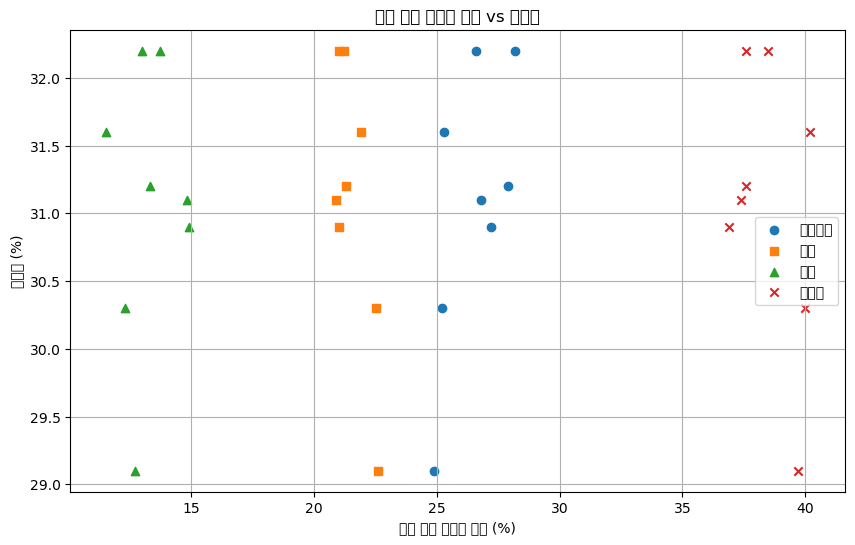

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 정의
years = list(range(2017, 2025))
very_match = [26.8, 27.2, 28.2, 27.9, 26.6, 25.3, 25.2, 24.9]
match       = [20.9, 21.0, 21.0, 21.3, 21.2, 21.9, 22.5, 22.6]
normal      = [14.8, 14.9, 13.0, 13.3, 13.7, 11.5, 12.3, 12.7]
unmatch     = [37.4, 36.9, 37.6, 37.6, 38.5, 40.2, 40.0, 39.7]
resign      = [31.1, 30.9, 32.2, 31.2, 32.2, 31.6, 30.3, 29.1]

# long 형태로 변환
data = []
for i in range(len(years)):
    data.append(('매우일치', very_match[i], resign[i], years[i]))
    data.append(('일치', match[i], resign[i], years[i]))
    data.append(('보통', normal[i], resign[i], years[i]))
    data.append(('불일치', unmatch[i], resign[i], years[i]))

df = pd.DataFrame(data, columns=['일치유형', '비율', '퇴사율', '연도'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
markers = {'매우일치': 'o', '일치': 's', '보통': '^', '불일치': 'x'}
colors = {'매우일치': 'tab:blue', '일치': 'tab:orange', '보통': 'tab:green', '불일치': 'tab:red'}

for category in df['일치유형'].unique():
    sub = df[df['일치유형'] == category]
    plt.scatter(sub['비율'], sub['퇴사율'], label=category, marker=markers[category], color=colors[category])

plt.xlabel('전공 일치 항목별 비율 (%)')
plt.ylabel('퇴사율 (%)')
plt.title('전공 일치 항목별 비율 vs 퇴사율')
plt.grid(True)
plt.legend()
plt.show()


c:\Users\PC\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\PC\AppData\Local\Temp\ipykernel_35708\3282718410.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = (values[i] / total) * 100 if total > 0 else 0
C:\Users\PC\AppData\Local\Temp\ipykernel_35708\3282718410.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = (values[i] / total) * 100 if total > 0 else 0
C:\Users\PC\AppData\Local\Temp\ipykernel_35708\3282718410.py:45: FutureWarning

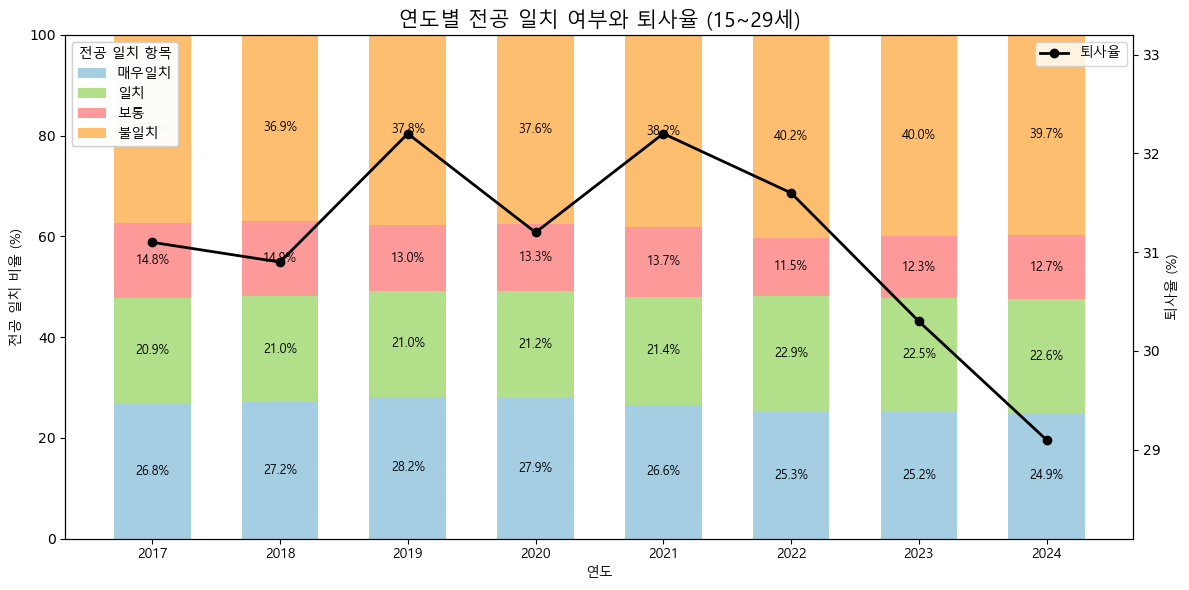

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 1. 엑셀 파일 불러오기
file_path = "C:/Users/PC/Desktop/midproject/data/전공일치.xlsx"
df = pd.read_excel(file_path)

# 2. 첫 행을 컬럼으로 지정
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df.columns = df.columns.astype(str)

# 3. 조건 필터링 (15~29세, 전체 성별)
df_filtered = df[(df['연령별'] == '15~29세') & (df['성별'] == '계')]

# 4. 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 5. 연도별 열 인덱스 설정
year_indices = {
    '2017': list(range(3, 7)),
    '2018': list(range(8, 12)),
    '2019': list(range(13, 17)),
    '2020': list(range(18, 22)),
    '2021': list(range(23, 27)),
    '2022': list(range(28, 32)),
    '2023': list(range(33, 37)),
    '2024': list(range(38, 42)),
}

categories = ['매우일치', '일치', '보통', '불일치']
category_percent = {cat: [] for cat in categories}
years = list(year_indices.keys())

# 6. 전공일치 비율 계산
for year, idxs in year_indices.items():
    values = df_filtered.iloc[0, idxs]
    values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)
    values = values[::-1]
    total = values.sum()
    for i, cat in enumerate(categories):
        pct = (values[i] / total) * 100 if total > 0 else 0
        category_percent[cat].append(pct)

# ✅ 7. 퇴사율 데이터 직접 입력
resign_rate = [31.1, 30.9, 32.2, 31.2, 32.2, 31.6, 30.3, 29.1]  # 2017~2024

# 8. 그래프 그리기
x = np.arange(len(years))
bar_width = 0.6
bottom = np.zeros(len(years))
pastel_colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

fig, ax1 = plt.subplots(figsize=(12, 6))

# ✅ 누적 막대그래프 (좌측 y축)
for i, cat in enumerate(categories):
    heights = category_percent[cat]
    bars = ax1.bar(x, heights, bar_width, bottom=bottom, label=cat, color=pastel_colors[i])
    for j in range(len(x)):
        y_pos = bottom[j] + heights[j] / 2
        if heights[j] >= 5:
            ax1.text(x[j], y_pos, f'{heights[j]:.1f}%', ha='center', va='center', fontsize=9, fontproperties=fontprop)
    bottom += heights

ax1.set_xticks(x)
ax1.set_xticklabels(years, fontproperties=fontprop)
ax1.set_xlabel("연도", fontproperties=fontprop)
ax1.set_ylabel("전공 일치 비율 (%)", fontproperties=fontprop)
ax1.set_ylim(0, 100)

# ✅ 퇴사율 선 그래프 (우측 y축)
ax2 = ax1.twinx()
ax2.plot(x, resign_rate, color='black', marker='o', label='퇴사율', linewidth=2)
ax2.set_ylabel("퇴사율 (%)", fontproperties=fontprop)
ax2.set_ylim(min(resign_rate)-1, max(resign_rate)+1)

# ✅ 제목과 범례
ax1.set_title("연도별 전공 일치 여부와 퇴사율 (15~29세)", fontproperties=fontprop, fontsize=15)
bars_legend = ax1.legend(title="전공 일치 항목", title_fontproperties=fontprop, prop=fontprop, loc='upper left')
line_legend = ax2.legend(prop=fontprop, loc='upper right')
ax1.add_artist(bars_legend)

plt.tight_layout()
plt.show()


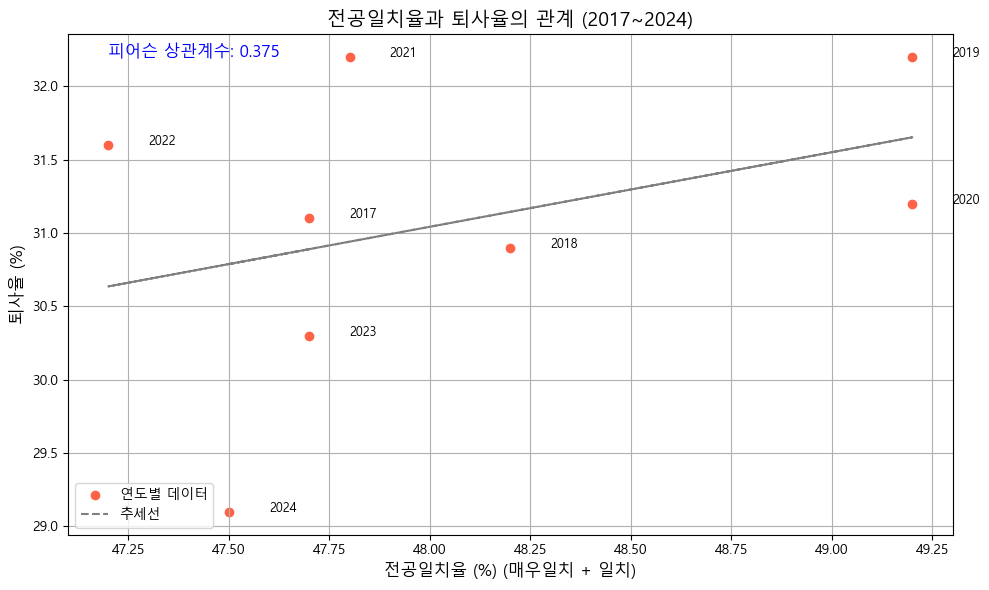

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 데이터 정의
years = list(range(2017, 2025))
very_match = [26.8, 27.2, 28.2, 27.9, 26.6, 25.3, 25.2, 24.9]
match = [20.9, 21.0, 21.0, 21.3, 21.2, 21.9, 22.5, 22.6]
resign_rate = [31.1, 30.9, 32.2, 31.2, 32.2, 31.6, 30.3, 29.1]
match_rate = [v + m for v, m in zip(very_match, match)]

# 한글 폰트 설정 (Windows 기준)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 상관계수 계산
corr = np.corrcoef(match_rate, resign_rate)[0, 1]

# 산점도 + 추세선
plt.figure(figsize=(10, 6))
plt.scatter(match_rate, resign_rate, color='tomato', label='연도별 데이터')

# 연도 텍스트 표시
for i in range(len(years)):
    plt.text(match_rate[i] + 0.1, resign_rate[i], str(years[i]), fontsize=9)

# 추세선 추가
fit = np.polyfit(match_rate, resign_rate, 1)
fit_fn = np.poly1d(fit)
plt.plot(match_rate, fit_fn(match_rate), color='gray', linestyle='--', label='추세선')

# 라벨 및 제목
plt.xlabel('전공일치율 (%) (매우일치 + 일치)', fontsize=12)
plt.ylabel('퇴사율 (%)', fontsize=12)
plt.title('전공일치율과 퇴사율의 관계 (2017~2024)', fontsize=14)
plt.legend()
plt.grid(True)

# 상관계수 표시
plt.text(min(match_rate), max(resign_rate), f'피어슨 상관계수: {corr:.3f}', fontsize=12, color='blue')

plt.tight_layout()
plt.show()
